### 1. 关于全局最优化求解
  全局最优化是一个非常复杂的问题，目前还没有一个通用的办法可以对任意复杂函数求解全局最优值。上一篇文章讲解了一个求解局部极小值的方法——梯度下降法。这种方法对于求解精度不高的情况是实用的，可以用局部极小值近似替代全局最小值点。但是当要求精确求解全局最小值时，梯度下降法就不适用了，需要采用其他的办法求解。常见的求解全局最优的办法有拉格朗日法、线性规划法、以及一些人工智能算法比如遗传算法、粒子群算法、模拟退火算法等(可以参见我之前的博客)。而今天要讲的是一个操作简单但是不易陷入局部极小值的方法：随机游走算法。

### 2.随机游走算法操作步骤

<img align ='left' width='800' height='400' src="picture/randomwalk/mHUE19LidpXS40r5W5fAR0986xCP7_geCknLtTBtXYE.original.fullsize.png" />

### 3.代码实现


align ='left' width='800' height='400' 

<img align ='left' width='800' height='400'  src="picture/randomwalk/SLc3EUvPjZnIw_3QRi_R99fIVnrHj9w045HSleSsScY.original.fullsize.png" />

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time   : 2017/7/20 10:08
# @Author : Lyrichu
# @Email  : 919987476@qq.com
# @File   : random_walk.py
'''
@Description:使用随机游走算法求解函数极值
这里求解:f = sin(r)/r + 1,r = sqrt((x-50)^2+(y-50)^2)+e,0<=x,y<=100 的最大值
求解f的最大值，可以转化为求-f的最小值问题
'''
from __future__  import print_function
import math
import random
N = 100 # 迭代次数
step = 0.5 # 初始步长
epsilon = 0.00001
variables = 2 # 变量数目
x = [49,49] # 初始点坐标
walk_num = 1 # 初始化随机游走次数
print("迭代次数:",N)
print("初始步长:",step)
print("epsilon:",epsilon)
print("变量数目:",variables)
print("初始点坐标:",x)
# 定义目标函数
def function(x):
    r = math.sqrt((x[0]-50)**2 + (x[1]-50)**2) + math.e
    f = math.sin(r)/r + 1
    return -f
# 开始随机游走
while(step > epsilon):
    k = 1 # 初始化计数器
    while(k < N):
        u = [random.uniform(-1,1) for i in range(variables)] # 随机向量
        # u1 为标准化之后的随机向量
        u1 = [u[i]/math.sqrt(sum([u[i]**2 for i in range(variables)])) for i in range(variables)]
        x1 = [x[i] + step*u1[i] for i in range(variables)]
        if(function(x1) < function(x)): # 如果找到了更优点
            k = 1
            x = x1
        else:
            k += 1
    step = step/2
    print("第%d次随机游走完成。" % walk_num)
    walk_num += 1
print("随机游走次数:",walk_num-1)
print("最终最优点:",x)
print("最终最优值:",function(x))

迭代次数: 100
初始步长: 0.5
epsilon: 1e-05
变量数目: 2
初始点坐标: [49, 49]
第1次随机游走完成。
第2次随机游走完成。
第3次随机游走完成。
第4次随机游走完成。
第5次随机游走完成。
第6次随机游走完成。
第7次随机游走完成。
第8次随机游走完成。
第9次随机游走完成。
第10次随机游走完成。
第11次随机游走完成。
第12次随机游走完成。
第13次随机游走完成。
第14次随机游走完成。
第15次随机游走完成。
第16次随机游走完成。
随机游走次数: 16
最终最优点: [50.00000204798463, 50.00000059299177]
最终最优值: -1.1511171579374544


#### 基本的随机游走算法对于初始点比较敏感，可以看出，当初始点位于最优点附件时，可以很好地达到全局最优点；如果将初始点设置得离最优点较远，比如设置初始点为(10,10)时，其他参数不变，得到结果为：

In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time   : 2017/7/20 10:08
# @Author : Lyrichu
# @Email  : 919987476@qq.com
# @File   : random_walk.py
'''
@Description:使用随机游走算法求解函数极值
这里求解:f = sin(r)/r + 1,r = sqrt((x-50)^2+(y-50)^2)+e,0<=x,y<=100 的最大值
求解f的最大值，可以转化为求-f的最小值问题
'''
from __future__  import print_function
import math
import random
N = 100 # 迭代次数
step = 0.5 # 初始步长
epsilon = 0.00001
variables = 2 # 变量数目
x = [10,10] # 初始点坐标
walk_num = 1 # 初始化随机游走次数
print("迭代次数:",N)
print("初始步长:",step)
print("epsilon:",epsilon)
print("变量数目:",variables)
print("初始点坐标:",x)
# 定义目标函数
def function(x):
    r = math.sqrt((x[0]-50)**2 + (x[1]-50)**2) + math.e
    f = math.sin(r)/r + 1
    return -f
# 开始随机游走
while(step > epsilon):
    k = 1 # 初始化计数器
    while(k < N):
        u = [random.uniform(-1,1) for i in range(variables)] # 随机向量
        # u1 为标准化之后的随机向量
        u1 = [u[i]/math.sqrt(sum([u[i]**2 for i in range(variables)])) for i in range(variables)]
        x1 = [x[i] + step*u1[i] for i in range(variables)]
        if(function(x1) < function(x)): # 如果找到了更优点
            k = 1
            x = x1
        else:
            k += 1
    step = step/2
    print("第%d次随机游走完成。" % walk_num)
    walk_num += 1
print("随机游走次数:",walk_num-1)
print("最终最优点:",x)
print("最终最优值:",function(x))

迭代次数: 100
初始步长: 0.5
epsilon: 1e-05
变量数目: 2
初始点坐标: [10, 10]
第1次随机游走完成。
第2次随机游走完成。
第3次随机游走完成。
第4次随机游走完成。
第5次随机游走完成。
第6次随机游走完成。
第7次随机游走完成。
第8次随机游走完成。
第9次随机游走完成。
第10次随机游走完成。
第11次随机游走完成。
第12次随机游走完成。
第13次随机游走完成。
第14次随机游走完成。
第15次随机游走完成。
第16次随机游走完成。
随机游走次数: 16
最终最优点: [9.588796010400928, 12.127595221426477]
最终最优值: -1.0172084874716278


#### 可以发现，随机游走陷入了局部最优点。当然，如果增大迭代次数N以及初始步长step，可以在一定程度上增加寻优能力，比如设置N=3000,step=10.0，得到结果如下：

In [6]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time   : 2017/7/20 10:08
# @Author : Lyrichu
# @Email  : 919987476@qq.com
# @File   : random_walk.py
'''
@Description:使用随机游走算法求解函数极值
这里求解:f = sin(r)/r + 1,r = sqrt((x-50)^2+(y-50)^2)+e,0<=x,y<=100 的最大值
求解f的最大值，可以转化为求-f的最小值问题
'''
from __future__  import print_function
import math
import random
N = 2000 # 迭代次数
step = 10 # 初始步长
epsilon = 0.00001
variables = 2 # 变量数目
x = [10,10] # 初始点坐标
walk_num = 1 # 初始化随机游走次数
print("迭代次数:",N)
print("初始步长:",step)
print("epsilon:",epsilon)
print("变量数目:",variables)
print("初始点坐标:",x)
# 定义目标函数
def function(x):
    r = math.sqrt((x[0]-50)**2 + (x[1]-50)**2) + math.e
    f = math.sin(r)/r + 1
    return -f
# 开始随机游走
while(step > epsilon):
    k = 1 # 初始化计数器
    while(k < N):
        u = [random.uniform(-1,1) for i in range(variables)] # 随机向量
        # u1 为标准化之后的随机向量
        u1 = [u[i]/math.sqrt(sum([u[i]**2 for i in range(variables)])) for i in range(variables)]
        x1 = [x[i] + step*u1[i] for i in range(variables)]
        if(function(x1) < function(x)): # 如果找到了更优点
            k = 1
            x = x1
        else:
            k += 1
    step = step/2
    print("第%d次随机游走完成。" % walk_num)
    walk_num += 1
print("随机游走次数:",walk_num-1)
print("最终最优点:",x)
print("最终最优值:",function(x))

迭代次数: 2000
初始步长: 10
epsilon: 1e-05
变量数目: 2
初始点坐标: [10, 10]
第1次随机游走完成。
第2次随机游走完成。
第3次随机游走完成。
第4次随机游走完成。
第5次随机游走完成。
第6次随机游走完成。
第7次随机游走完成。
第8次随机游走完成。
第9次随机游走完成。
第10次随机游走完成。
第11次随机游走完成。
第12次随机游走完成。
第13次随机游走完成。
第14次随机游走完成。
第15次随机游走完成。
第16次随机游走完成。
第17次随机游走完成。
第18次随机游走完成。
第19次随机游走完成。
第20次随机游走完成。
随机游走次数: 20
最终最优点: [49.99999283170657, 50.000004994330084]
最终最优值: -1.1511145755858836


#### 可以看出，当增大迭代次数以及初始步长之后，函数最终达到了全局最优点。但是迭代次数增加的代价则是运行时间的增加。总得来说，基本的随机游走算法可以很好地达到全局最优点，但是有时会依赖于初始点的选择。

### 改进的随机游走算法

<img align ='left' width='800' height='400'  src="picture/randomwalk/xtC2bZ-246CtholEAEwTeEvFttvyue6avBCaXC41u44.original.fullsize.png" />

In [8]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time   : 2017/7/20 10:48
# @Author : Lyrichu
# @Email  : 919987476@qq.com
# @File   : improve_random_walk.py
'''
@Description:改进的随机游走算法
这里求解:f = sin(r)/r + 1,r = sqrt((x-50)^2+(y-50)^2)+e,0<=x,y<=100 的最大值
求解f的最大值，可以转化为求-f的最小值问题
'''
from __future__  import print_function
import math
import random
N = 100 # 迭代次数
step = 10.0 # 初始步长
epsilon = 0.00001
variables = 2 # 变量数目
x = [-100,-10] # 初始点坐标
walk_num = 1 # 初始化随机游走次数
n = 10 # 每次随机生成向量u的数目
print("迭代次数:",N)
print("初始步长:",step)
print("每次产生随机向量数目:",n)
print("epsilon:",epsilon)
print("变量数目:",variables)
print("初始点坐标:",x)
# 定义目标函数
def function(x):
    r = math.sqrt((x[0]-50)**2 + (x[1]-50)**2) + math.e
    f = math.sin(r)/r + 1
    return -f
# 开始随机游走
while(step > epsilon):
    k = 1 # 初始化计数器
    while(k < N):
        # 产生n个向量u
        x1_list = [] # 存放x1的列表
        for i in range(n):
            u = [random.uniform(-1,1) for i1 in range(variables)] # 随机向量
            # u1 为标准化之后的随机向量
            u1 = [u[i3]/math.sqrt(sum([u[i2]**2 for i2 in range(variables)])) for i3 in range(variables)]
            x1 = [x[i4] + step*u1[i4] for i4 in range(variables)]
            x1_list.append(x1)
        f1_list = [function(x1) for x1 in x1_list]
        f1_min = min(f1_list)
        f1_index = f1_list.index(f1_min)
        x11 = x1_list[f1_index] # 最小f1对应的x1
        if(f1_min < function(x)): # 如果找到了更优点
            k = 1
            x = x11
        else:
            k += 1
    step = step/2
    print("第%d次随机游走完成。" % walk_num)
    walk_num += 1
print("随机游走次数:",walk_num-1)
print("最终最优点:",x)
print("最终最优值:",function(x))

迭代次数: 100
初始步长: 10.0
每次产生随机向量数目: 10
epsilon: 1e-05
变量数目: 2
初始点坐标: [-100, -10]
第1次随机游走完成。
第2次随机游走完成。
第3次随机游走完成。
第4次随机游走完成。
第5次随机游走完成。
第6次随机游走完成。
第7次随机游走完成。
第8次随机游走完成。
第9次随机游走完成。
第10次随机游走完成。
第11次随机游走完成。
第12次随机游走完成。
第13次随机游走完成。
第14次随机游走完成。
第15次随机游走完成。
第16次随机游走完成。
第17次随机游走完成。
第18次随机游走完成。
第19次随机游走完成。
第20次随机游走完成。
随机游走次数: 20
最终最优点: [49.999999448277194, 50.000009520606206]
最终最优值: -1.1511142627846622


可以发现，即使迭代次数N=100不大，初始点(−100,−10)离最优点(50,50)非常远，改进的随机游走算法依然可以达到最优点。这说明了改进的随机游走算法具有更强大的寻优能力以及对于初始点更低的依赖性。

注：经过多次试验发现，无论是随机游走算法还是改进的随机游走算法，对于步长都是非常依赖的。步长λ越大，意味着初始可以寻找最优解的空间越大，但同时也意味着更多的迭代次数(要搜索空间变大，寻找次数变多，相应时间自然要增加)。如果步长取得过小，即使N很大，也很难达到最优解。无论对于随机游走算法还是改进的随机游走算法皆是如此。所以理论上步长λ越大越好。但是步长越大，迭代总次数越高，算法运行时间越长。所以实践中可以多试验几次，将λ取得适当地大即可。

<img align ='left' width='800' height='400' src="picture/randomwalk/emll834Emtxm4JU26zYnrpcn3LHxmKfVD8cX8qHe3Vw.original.fullsize.png" />

$\left\langle y^{2}(t)\right\rangle$ 表示方差，t表示走t步（每步向上/下移动一个单位），n个随机游走过程/函数的方差

t轮的标准差正比于根号t，也就是n个随机过程的y(t)值偏移0点的距离

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [51]:
res= []
n=10
while n:
    x = [np.random.choice([-1,1]) for i in range(5000)]
    tmp = 0
    for i in range(len(x)):
        tmp = tmp+x[i]
        x[i] = tmp 
    res.append(x)
    n-=1

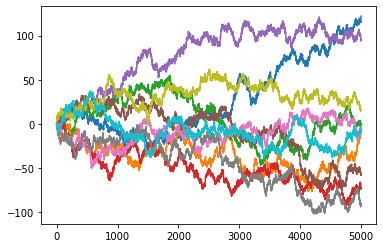

In [52]:
for i in res:
    plt.plot(i)

In [50]:
np.sqrt(5000)

70.71067811865476